In [1]:
import numpy as np
from scipy import ndimage
from imageio import imread
import matplotlib.pyplot as plt
from skimage import measure
#from skimage.transform import rotate
from glob import glob
from sklearn.cluster import KMeans
from numpy import sqrt

In [2]:
import scipy
scipy.__version__

'1.6.2'

In [3]:
from smallestenclosingcircle import *

In [4]:
# Crofton


#P4 = [0, np.pi/2, 0, 0, 0, np.pi/2, 0, 0, np.pi/2, np.pi, 0, 0 , np.pi/2, np.pi, 0, 0]
#P8 = [0, (np.pi/4)*(1+(1/np.sqrt(2))), (np.pi/(4*sqrt(2))), (np.pi/(2*sqrt(2))), 0, 
#     (np.pi/4)*(1+(1/np.sqrt(2))), 0, (np.pi/(4*sqrt(2))), np.pi/4, np.pi/2, 
#     (np.pi/(4*sqrt(2))), (np.pi/(4*np.sqrt(2))), np.pi/4, np.pi/2, 0, 0]


def crofton(image):
    inter = []
    h = np.array([[1, -1]])
    for i in range(4):
        im1 = np.copy(image)
        im2 = ndimage.rotate(im1, 45*i, order=0)
        im3 = ndimage.convolve(im2, h)
        inter.append(np.sum(im3>100))
        
    crofton = np.pi/4. * (inter[0]+inter[2] + (inter[1]+inter[3])/np.sqrt(2))
    return crofton

In [5]:
def feret(image):
    d = np.max(image.shape)
    D = 0
    
    for a in np.arange(0,180,30):
        im2 = ndimage.rotate(image, a, order=0)
        F = np.max(im2, axis=0)
        measure = np.sum(F>100)
        
        if measure<d:
            d = measure
        if measure>D:
            D = measure
    return d,D

In [6]:
def inscribed_radius(image):
    dm = ndimage.morphology.distance_transform_cdt(image>100)
    return np.max(dm)
    

In [7]:
def area(image):
    return np.sum(image>100)

$elongation = \frac{d}{D}$

$thinness = \frac{2\omega}{\pi} $

In [16]:
for i in range(1,21):
    name = ['apple-*.bmp', 'Bone-*.bmp', 'camel-*.bmp']
    elongation = []
    thinness = []
    z = []
    roundness = []
    for pattern in name:
        names_list = glob(pattern)
        for file in names_list:
            image = imread(file)
            d,D = feret(image)
            croft = crofton(image)
            r = inscribed_radius(image)
            
            elongation.append(d/D)
            thinness.append(2*r/D)
            roundness.append(4*area(image)/(np.pi*(D**2)))
            z.append(croft/(np.pi*D))

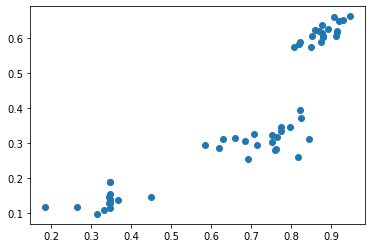

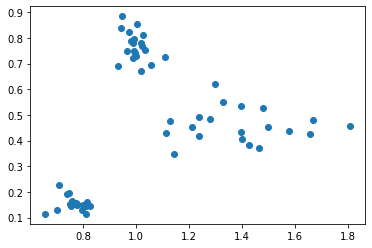

In [17]:
plt.figure()
plt.scatter(elongation, thinness)

plt.figure()
plt.scatter(z, roundness)